
<h1 align=left><font size = 5>Predicting Caravan Customers</font></h1>

Capstone Project: Insurance Company Benchmark

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

##  **Introduction**

A Norwegian insurance company was interested in a machine learning solution to find best customers to market its caravan insurance product. Without sending mass email to all customers, it is cost effective for the company to identify best possible customers who will buy caravan insurance and only approach those customers.

**Dataset**: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data
Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29


**Reserch questions**

Q1. Predict which customers are potentially interested in a caravan insurance policy.

Q2. Describe the actual or potential customers; and possibly explain why these customers buy a caravan policy.

Q3. How does Caravan Insurance ownership varies across different demographic areas, and can we create distinct profiles of Caravan Insurance customers based on sociodemographic data?

Q4. Predicting a customer's likelihood to purchase Caravan Insurance based on their sociodemographic characteristics

Q5. What frequent associations can be identified in the product ownership data?


##  **Approach**

*  Exploratory Data Analysis (EDA):

   *  Visit EDA   [here](https:////github.com/manohariw44/TMU-Big-Data-Analytics-Capstone-Project/blob/da078af84674f2f8550782067226fa07c35b539d/PY01_Capst_EDA.ipynb)
     


*  Preprocessing:

   *  Encoding the categorical features
       *  Categorical to One-Hot (numeric) Encoding
   *  Split the dataset into training and testing sets
   *  Create cross-validation sets

*  Classification Model:

   *  Approach 1 - Multinomial Naïve Bayes:
      *  Choose traning/test split
      *  Use Naïve Byes classifier from Python sklearn and weka packages
      *  Evaluate model using confusion matrix
      

   *  Approach 2 - Decision Tree :
      * Choose training/test split, maximum depth of tree
      * Evaluate model using confusion matrix

   *  Approach 3 - Random forest :
      * Start by randomly selecting a subset of the training data, with replacement.
      *  Select features and build decision tree
      *  Repeat steps
      *  Combine the predictions of all trees to make a final prediction


   *  Approach 4 - Logistic regression:
      

   *  Approach 5 - K Nearest Neighbours :   
      

*  Feature Selection
    *  Correlation Matrix
    *  Univarate testing  - Classification task
        *  Examine chi-squre score and p value for each attribute
    * Recursive Feature Elimination with Cross validation
    *  k fold cross validation
        * split training data into k equally sized subsets or folds
        * The model is trained on k-1 of these folds and tested on the remaining fold.
        * The performance of the model is then averaged across all k folds


* Association Rules:

  *  Approach 1 - Apriori :
     
      * Select features using Chi-square Test, Fisher’s Score

  *  Approach 2 - k-means algorithm :

  * Model selection criteria
     * high accuracy, high recall on target = 1




 Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
!pip install pandas-profiling
import pandas_profiling
import plotly.express as px

In [ ]:
#Installing Python packages
import pandas as pd
import numpy as np

import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
import graphviz


load data and store in dataframe df_ori:

In [ ]:
# Data set for training model
df_ori = pd.read_csv("/content/ticdata2000.txt",  delimiter = "\t",header=None)

In [ ]:
# Add column headings
# column names from the data dictionary
#df_ori.columns=['MOSTYPE',	'MAANTHUI',	'MGEMOMV',	'MGEMLEEF',	'MOSHOOFD',	'MGODRK',	'MGODPR',	'MGODOV',	'MGODGE',	'MRELGE',	'MRELSA',	'MRELOV',	'MFALLEEN',	'MFGEKIND',	'MFWEKIND',	'MOPLHOOG',	'MOPLMIDD',	'MOPLLAAG',	'MBERHOOG',	'MBERZELF',	'MBERBOER',	'MBERMIDD',	'MBERARBG',	'MBERARBO',	'MSKA',	'MSKB1',	'MSKB2',	'MSKC',	'MSKD',	'MHHUUR',	'MHKOOP',	'MAUT1',	'MAUT2',	'MAUT0',	'MZFONDS',	'MZPART',	'MINKM30',	'MINK3045',	'MINK4575',	'MINK7512',	'MINK123M',	'MINKGEM',	'MKOOPKLA',	'PWAPART',	'PWABEDR',	'PWALAND',	'PPERSAUT',	'PBESAUT',	'PMOTSCO',	'PVRAAUT',	'PAANHANG',	'PTRACTOR',	'PWERKT',	'PBROM',	'PLEVEN',	'PPERSONG',	'PGEZONG',	'PWAOREG',	'PBRAND',	'PZEILPL',	'PPLEZIER',	'PFIETS',	'PINBOED',	'PBYSTAND',	'AWAPART',	'AWABEDR',	'AWALAND',	'APERSAUT',	'ABESAUT',	'AMOTSCO',	'AVRAAUT',	'AAANHANG',	'ATRACTOR',	'AWERKT',	'ABROM',	'ALEVEN',	'APERSONG',	'AGEZONG',	'AWAOREG',	'ABRAND',	'AZEILPL',	'APLEZIER',	'AFIETS',	'AINBOED',	'ABYSTAND',	'CARAVAN']
# English coulmn names for ease of reference. 1 - 43 are demographic varaibles (column name with prefix sd_), values based on zip code.
#44-86 are product ownership of insurance customers (column name with prefix po_).  target varaible : po_ins_pol_caravan
#df_ori.columns=['cust_subtype',	'no_of_houses',	'avg_household',	'avg_age_band',	'cust_maintype',	'religion_catholic',	'religion_protestant',	'religion_other',	'religion_no',	'rel_married',	'rel_living_tg',	'rel_other',	'rel_no_singles',	'hshold_wo_children',	'hshold_w_children',	'education_higher',	'education_medium',	'education_lower',	'empst_high',	'empst_Entrepr ',	'empst_farmer',	'empst_mdl_mgmt',	'empst_skill_labour',	'empst_unskill_labour',	'socialclassA',	'socialclassB1',	'socialclassB2',	'socialclassC',	'socialclassD',	'rentedhouse',	'homeowners',	'car_1',	'car_2',	'car_0',	'health_ins_national',	'health_ins_private',	'income_l_30k',	'income_30k_45k',	'income_45k_75k',	'income_75k_122k',	'income_g_123k',	'income_avg',	'p_power_class',	'ins_pol_thirdparty_pvt',	'ins_pol_thirdparty_firms',	'ins_pol_thirdparty_agri',	'ins_pol_car',	'ins_pol_del_van',	'ins_pol_motorcycle_sc',	'ins_pol_lorry',	'ins_pol_trailer',	'ins_pol_tractor',	'ins_pol_agri_machines',	'ins_pol_moped',	'ins_pol_life',	'ins_pol_accident_ins_pvt',	'ins_pol_accident_ins_fam',	'ins_pol_disability',	'ins_pol_fire',	'ins_pol_surfboard',	'ins_pol_boat',	'ins_pol_bicycle',	'ins_pol_property',	'ins_pol_social security',	'no_ins_pol_thirdparty_pvt',	'no_ins_pol_thirdparty_firms',	'no_ins_pol_thirdparty_agri',	'no_ins_pol_car',	'no_ins_pol_del_van',	'no_ins_pol_motorcycle_sc',	'no_ins_pol_lorry',	'no_ins_pol_trailer',	'no_ins_pol_tractor',	'no_ins_pol_agri_machines',	'no_ins_pol_moped',	'no_ins_pol_life',	'no_ins_pol_accident_ins_pvt',	'no_ins_pol_accident_ins_fam',	'no_ins_pol_disability',	'no_ins_pol_fire',	'no_ins_pol_surfboard',	'no_ins_pol_boat',	'no_ins_pol_bicycle',	'no_ins_pol_property',	'no_ins_pol_social security',	'no_ins_pol_caravan']
df_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ,	'po_ins_pol_caravan']
df_ori.head()

,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,...,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_fire,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Dataset to use benchmarking model.
df_benchmk_eval_ori = pd.read_csv("/content/ticeval2000.txt",  delimiter = "\t",header=None)
df_benchmk_tgts_ori = pd.read_csv("/content/tictgts2000.txt",  delimiter = "\t",header=None)
# Add column headings
df_benchmk_eval_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ]
df_benchmk_tgts_ori.columns=['po_ins_pol_caravan']

In [ ]:
print('no of records and columns ',df_ori.shape)
# list the data types for each column
df_ori.dtypes

no of records and columns  (5822, 86)


sd_cust_subtype                  int64
sd_no_of_houses                  int64
sd_avg_household                 int64
sd_avg_age_band                  int64
sd_cust_maintype                 int64
                                 ...  
po_no_ins_pol_boat               int64
po_no_ins_pol_bicycle            int64
po_no_ins_pol_property           int64
po_no_ins_pol_social security    int64
po_ins_pol_caravan               int64
Length: 86, dtype: object

In [ ]:
df2=df_ori
for col in df2.columns:
  if df2[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df2[col] = df2[col].str.decode('utf-8')
#Look at loaded data and data types
print(df2.dtypes)

sd_cust_subtype                  int64
sd_no_of_houses                  int64
sd_avg_household                 int64
sd_avg_age_band                  int64
sd_cust_maintype                 int64
                                 ...  
po_no_ins_pol_boat               int64
po_no_ins_pol_bicycle            int64
po_no_ins_pol_property           int64
po_no_ins_pol_social security    int64
po_ins_pol_caravan               int64
Length: 86, dtype: object


In [ ]:
# checking value counts of target varaible
df_ori.po_ins_pol_caravan.value_counts()

0    5474
1     348
Name: po_ins_pol_caravan, dtype: int64

Benchmark file

In [ ]:
df_benchmk_tgts_ori.po_ins_pol_caravan.value_counts()

0    3762
1     238
Name: po_ins_pol_caravan, dtype: int64

# Preprocessing

**Changing type of attributes**

In [ ]:
# making a copy of the file
df_cat = df2
#Let's create a list for our categorical columns for data file.
cat_cols=df_cat.iloc[:, 0:86].columns

for col in cat_cols:
    #df_cat[col] = df_cat[col].astype('category',copy=False)
    df_cat[col] = df_cat[col].astype('str',copy=False)

print("\nExample data changed to category type")
print(df_cat.dtypes)


Example data changed to category type
sd_cust_subtype                  object
sd_no_of_houses                  object
sd_avg_household                 object
sd_avg_age_band                  object
sd_cust_maintype                 object
                                  ...  
po_no_ins_pol_boat               object
po_no_ins_pol_bicycle            object
po_no_ins_pol_property           object
po_no_ins_pol_social security    object
po_ins_pol_caravan               object
Length: 86, dtype: object


Processing benchmark dataset

In [ ]:
# converting benchmark dataset to categorical attributes
# making a copy of the file
df_benchmk_eval_cat = df_benchmk_eval_ori
#Let's create a list for our categorical columns for data file.
cat_cols=df_benchmk_eval_cat.iloc[:, 0:85].columns

for col in cat_cols:
    df_benchmk_eval_cat[col] = df_benchmk_eval_cat[col].astype('str',copy=False)

print("\nExample data changed to category type")
print(df_benchmk_eval_cat.dtypes)

df_benchmk_tgts_ori['po_ins_pol_caravan'] = df_benchmk_tgts_ori['po_ins_pol_caravan'].astype('str',copy=False)
print(df_benchmk_tgts_ori.dtypes)


Example data changed to category type
sd_cust_subtype                  object
sd_no_of_houses                  object
sd_avg_household                 object
sd_avg_age_band                  object
sd_cust_maintype                 object
                                  ...  
po_no_ins_pol_surfboard          object
po_no_ins_pol_boat               object
po_no_ins_pol_bicycle            object
po_no_ins_pol_property           object
po_no_ins_pol_social security    object
Length: 85, dtype: object
po_ins_pol_caravan    object
dtype: object


In [ ]:
# view frequency counts of values in categorical variables
for var in cat_cols:
        print(df_cat[var].value_counts())

**Categorical to One-Hot (numeric) Encoding**

Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [ ]:
# encoding benchmark dataset
# Create a copy of the data frame in memory with a different name
df_onehot=df_cat.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df_cat, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot.head()

,po_ins_pol_caravan,sd_cust_subtype_1,sd_cust_subtype_10,sd_cust_subtype_11,sd_cust_subtype_12,sd_cust_subtype_13,sd_cust_subtype_15,sd_cust_subtype_16,sd_cust_subtype_17,sd_cust_subtype_18,...,po_no_ins_pol_bicycle_0,po_no_ins_pol_bicycle_1,po_no_ins_pol_bicycle_2,po_no_ins_pol_bicycle_3,po_no_ins_pol_property_0,po_no_ins_pol_property_1,po_no_ins_pol_property_2,po_no_ins_pol_social security_0,po_no_ins_pol_social security_1,po_no_ins_pol_social security_2
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
print("Records form Original dataset ", df_ori.shape)
print("Records form Encoded dataset ", df_onehot.shape)

Records form Original dataset  (5822, 86)
Records form Encoded dataset  (5822, 629)


In [ ]:
# Create a copy of the benchmark data frame in memory with a different name
df_benchmk_eval_onehot=df_benchmk_eval_cat.copy()
#convert only categorical variables/features to dummy/one-hot features
df_benchmk_eval_onehot = pd.get_dummies(df_benchmk_eval_cat, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_benchmk_eval_onehot.head()

print("Records form Original dataset ", df_benchmk_eval_ori.shape)
print("Records form Encoded dataset ", df_benchmk_eval_onehot.shape)

Records form Original dataset  (4000, 85)
Records form Encoded dataset  (4000, 613)


**Split the dataset into training and testing sets**

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# using encoded dataset


df = df_cat

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features
class_col_name='po_ins_pol_caravan'

feature_names=df.columns[df.columns != class_col_name ]
# split of test/training datasets. x% test, (1-x)% training
test_dataset_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=test_dataset_size,random_state=10)

# Classification Model

**Approach 1 - Multinomial Naïve Bayes**

It is a classification technique based on Bayes' theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 86


Let's understand our Naive Bayes model

In [ ]:
#print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. This means, it used different values of each feature as frequencies which semantically may or may not be correct, as a higher value (like 2 ,3 and more) would mean more weight. We can solve this using one-hot encoding later but some people use this form of encoding in practice too. For now, let's see classification report.

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))

cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1642
           1       0.12      0.50      0.20       105

    accuracy                           0.76      1747
   macro avg       0.54      0.64      0.53      1747
weighted avg       0.91      0.76      0.82      1747

Confusion Matrix
[[1275  367]
 [  53   52]]
TP:  52 , FP:  367 , TN:  1275 , FN: 53


Results from various training / test splits

![Naive_Bayes_confusion_matrix.png]()

Results from various training / test splits

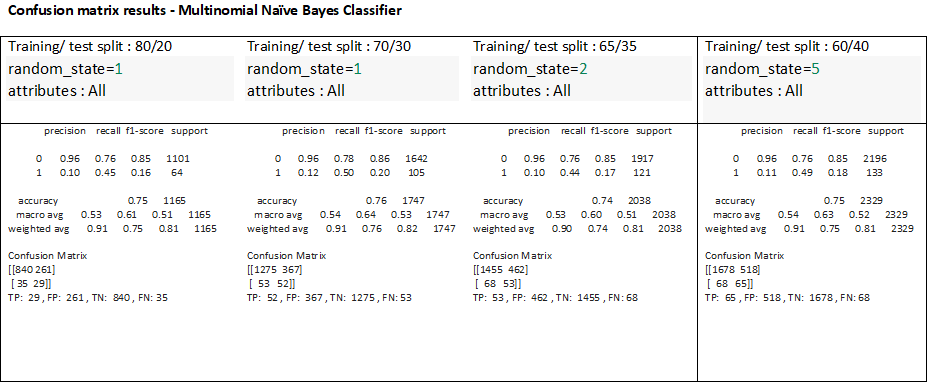

⚡**Precision** – What percent of your predictions were correct?
Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)

**Recall** – What percent of the positive cases did you catch?

Recall: Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)


 ♈In this reaserch there is no harm in having false predictions. But I am interested in having more positive cases.  I will choose the model with higher recall on target = 1. ♈

♈The aim of this research is to identify caravan customers from givven attributes. I will choose the model that give highest recall on target = 1. I will also look at the accuracy of the model. In above results, I will select the model with 70/30 training /test split. it is reporting accuracy of 76% and recall = 0.5 .

After examining results from other algorithms used in this research, the best model will be selected.

♈

✅ Benchmark

In [ ]:
# testing on benchmark dataset

#Predict the response for test dataset
y_pred = nb.predict(df_benchmk_eval_cat)

print(classification_report(df_benchmk_tgts_ori, y_pred))

cf=confusion_matrix(df_benchmk_tgts_ori, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      3762
           1       0.11      0.45      0.18       238

    accuracy                           0.75      4000
   macro avg       0.53      0.61      0.51      4000
weighted avg       0.91      0.75      0.81      4000

Confusion Matrix
[[2875  887]
 [ 130  108]]
TP:  108 , FP:  887 , TN:  2875 , FN: 130


confusion matrix for validating with benchmark dataset

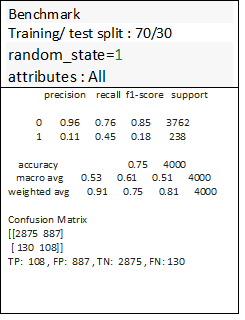

✅  This is good results as the initial model. The previous resercher who analysed this dataset has identified 121 caravan policies from the benchmark file.

We will improve prediction by using different algorithms and selecting features. :

❗ Problems encountered  

When I used dynamic encoded dataset to train the model, I couldn't find the same combination of values in the attributes in the product variables. eg. no of lorry policies = 2 were not in the benchmark dataset.

These are the attributes with higer propotion of 0. I will use dynamic encoding once I choose features that have more values.

**Decision Tree**

In [ ]:
from sklearn import tree

# selecting maximum depth of the tree
maxdepth = 50

clf = tree.DecisionTreeClassifier(max_depth=maxdepth)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Let's plot the tree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the grpahviz function.

class Names ['0' '1']


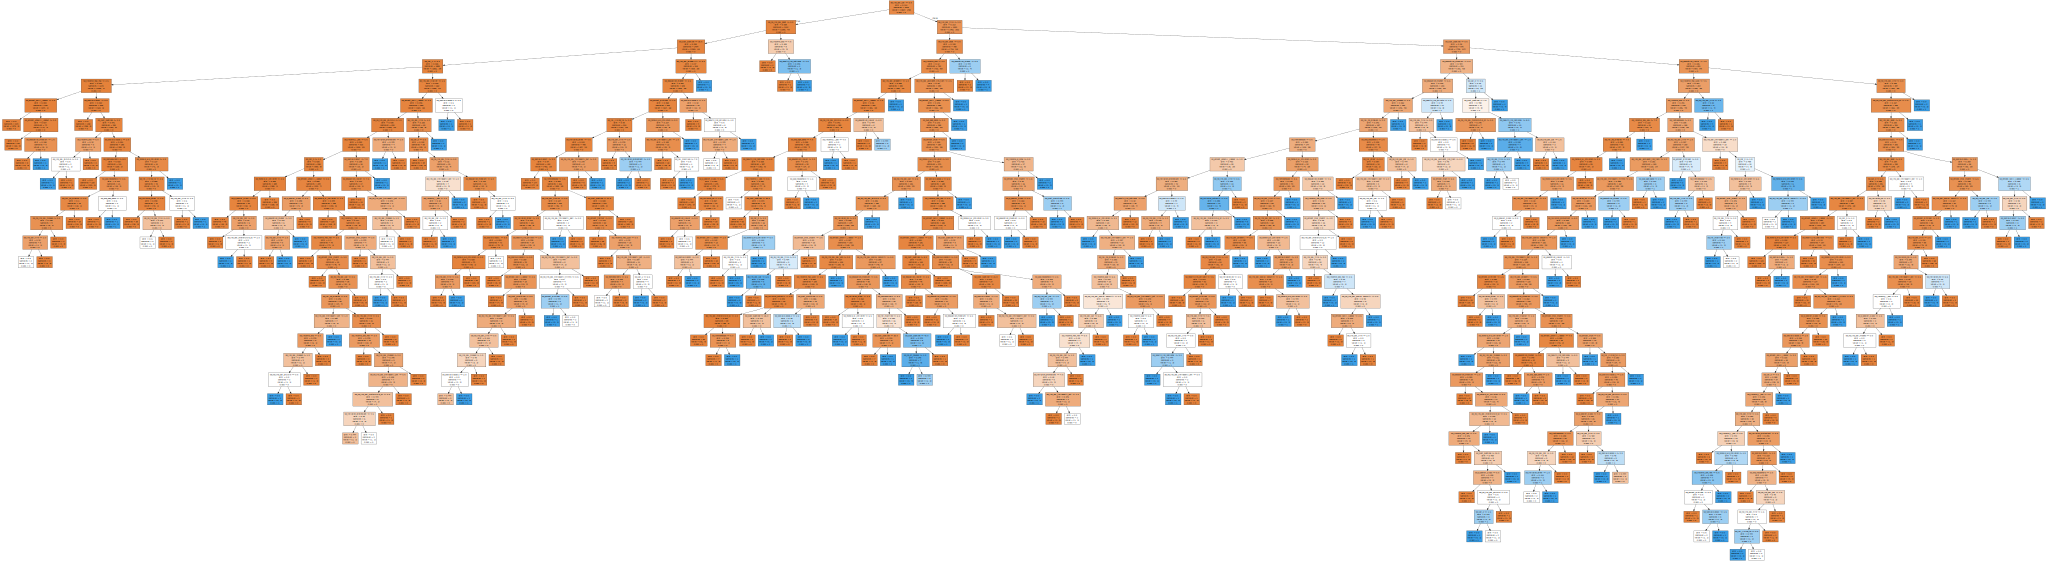

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df_cat[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
cf1=confusion_matrix(y_test, y_pred)

print ("Confusion Matrix")
print(cf1)
tn, fp, fn, tp=cf1.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1647
           1       0.13      0.14      0.13       100

    accuracy                           0.90      1747
   macro avg       0.54      0.54      0.54      1747
weighted avg       0.90      0.90      0.90      1747

Confusion Matrix
[[1551   96]
 [  86   14]]
TP:  14 , FP:  96 , TN:  1551 , FN: 86


**Decision Tree model evaluation results**

 model parameters
 split 20%, random state 10, depth of tree 50, attribute - All

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1647
           1       0.13      0.14      0.13       100

    accuracy                           0.90      1747
   macro avg       0.54      0.54      0.54      1747
weighted avg       0.90      0.90      0.90      1747

Confusion Matrix

[[1551   96]

 [  86   14]]

TP:  14 , FP:  96 , TN:  1551 , FN: 86

♈This reuslts from one run. We are researching more to improve the model. We will re run the model with selected features to get better results.  ♈